In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data_path = r'C:\Users\acer\Downloads\train.csv'
df = pd.read_csv(data_path)


In [3]:
# Initial Exploration
print(df.head())
print(df.info())
print(df.describe())

    player_id                 name  age gender    country height  weight  \
0   PLID_4964           Keva Horan   23      M    Ukraine    6'2  176lbs   
1  PLID_11234           Herma Tann   18      M     Russia   5'10  148lbs   
2  PLID_19127         Eilene Kizer   16      F      Spain    6'2  172lbs   
3  PLID_17467       Andrea Badgett   27      M      Chile   5'11  165lbs   
4   PLID_9661  Jeremiah Bumbalough   19      F  Argentina    5'8  158lbs   

   ball_controlling_skills  body_reflexes  body_balance  ...  strong_foot  \
0                     77.0           58.0          47.0  ...        Right   
1                     54.0           69.0          70.0  ...          Any   
2                     34.0           43.0          45.0  ...         Left   
3                     79.0           73.0          76.0  ...        Right   
4                     47.0           61.0          74.0  ...        Right   

   behaviour_rating  matches_played  fitness_rating  trophies_won  \
0          

### EDA

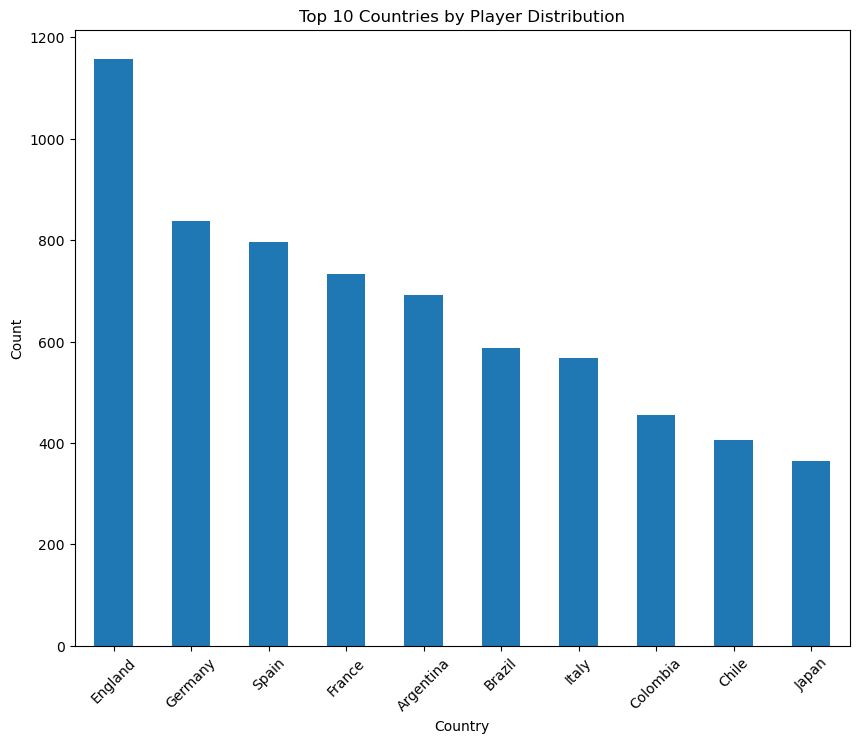

In [4]:
#Bar chort for player distribution vs countries(Top 10) 
plt.figure(figsize=(10, 8))
top_countries = df['country'].value_counts().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Player Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

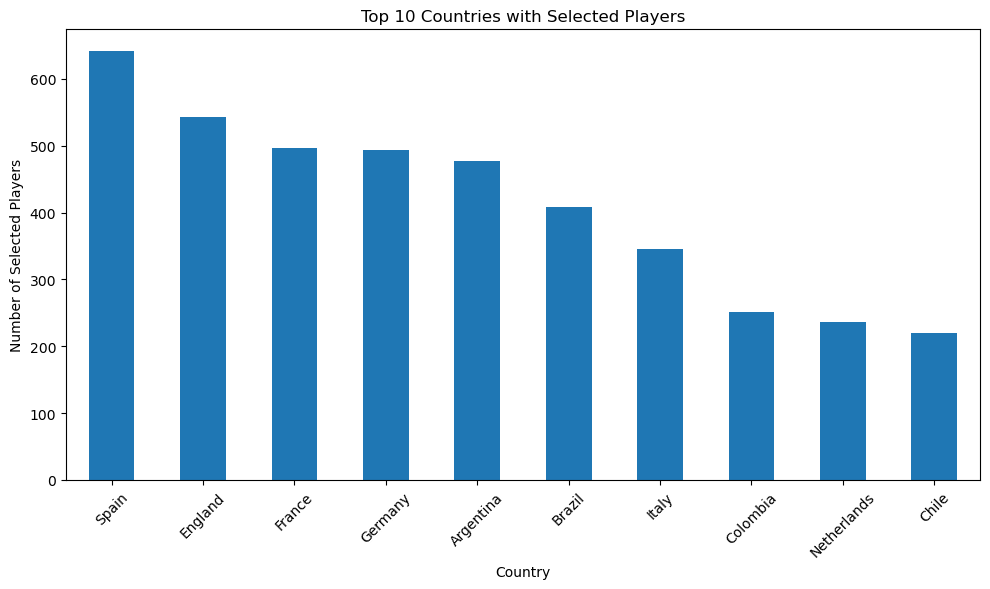

In [5]:
# Filter selected players
selected_players = df[df['selection'] == 1]

# Get the top 10 countries with selected players
top_countries = selected_players['country'].value_counts().head(10)

# Create a bar plot for top 10 countries with selected players
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Selected Players')
plt.title('Top 10 Countries with Selected Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_12992\449956059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_players['experience_bracket'] = pd.cut(selected_players['years_of_experience'], bins=bins, labels=labels, right=False)


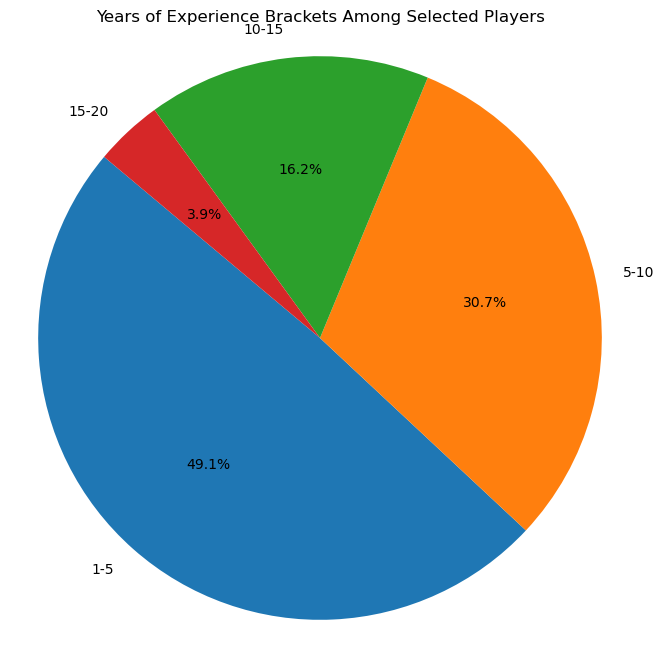

In [6]:
# Filter selected players
selected_players = df[df['selection'] == 1]

# Define the bins for years of experience
bins = [0, 5, 10, 15, 20]
labels = ['1-5', '5-10', '10-15', '15-20']

# Categorize years of experience into bins
selected_players['experience_bracket'] = pd.cut(selected_players['years_of_experience'], bins=bins, labels=labels, right=False)

# Create a pie chart for years of experience brackets among selected players
experience_counts = selected_players['experience_bracket'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Years of Experience Brackets Among Selected Players')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

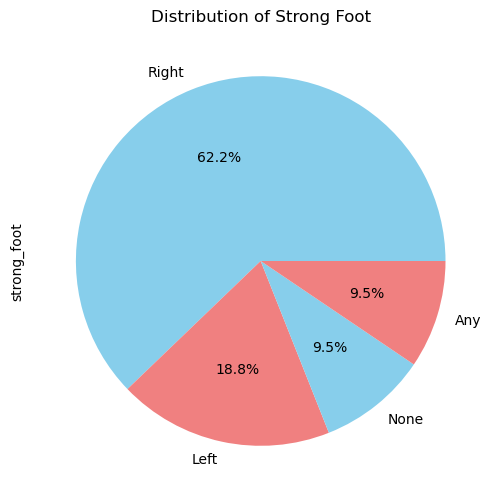

In [7]:
plt.figure(figsize=(6, 6))
df['strong_foot'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Strong Foot')
plt.show()

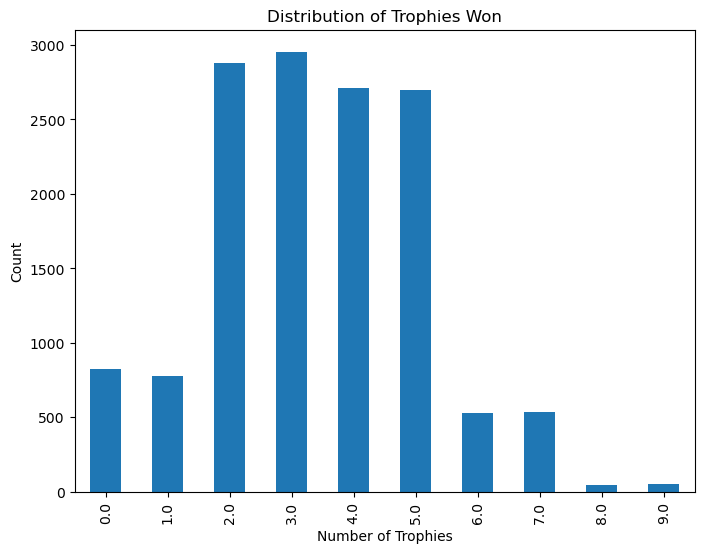

In [8]:
plt.figure(figsize=(8, 6))
df['trophies_won'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Trophies Won')
plt.xlabel('Number of Trophies')
plt.ylabel('Count')
plt.show()

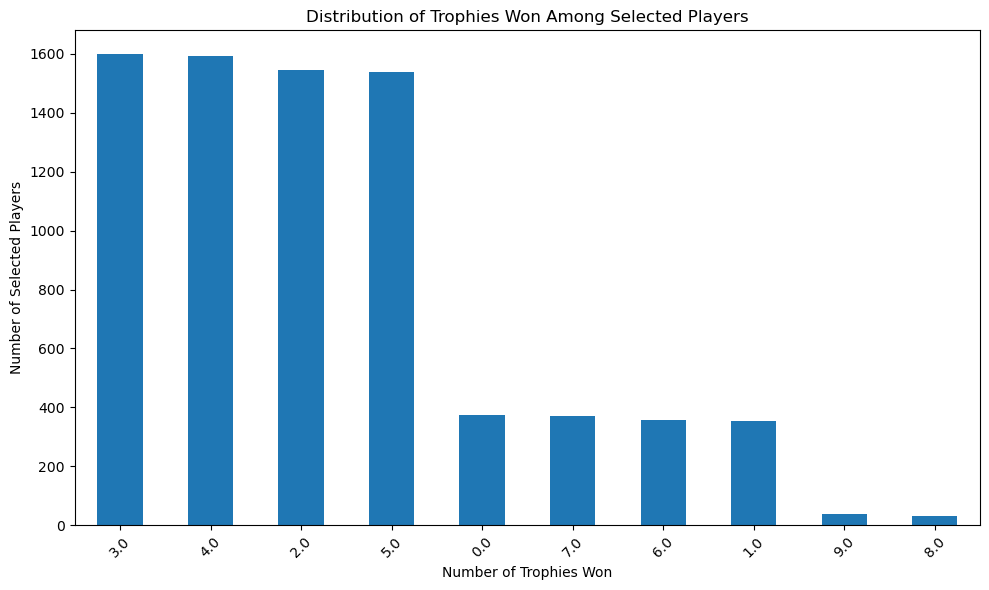

In [9]:
# Filter selected players
selected_players = df[df['selection'] == 1]

# Create a bar plot for trophies won among selected players
trophies_counts = selected_players['trophies_won'].value_counts()
plt.figure(figsize=(10, 6))
trophies_counts.plot(kind='bar')
plt.xlabel('Number of Trophies Won')
plt.ylabel('Number of Selected Players')
plt.title('Distribution of Trophies Won Among Selected Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

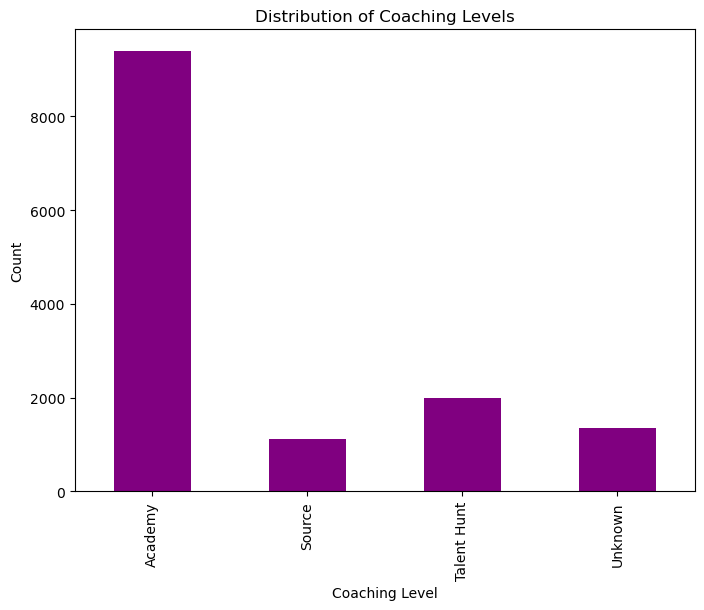

In [10]:
plt.figure(figsize=(8, 6))
df['coaching'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Coaching Levels')
plt.xlabel('Coaching Level')
plt.ylabel('Count')
plt.show()

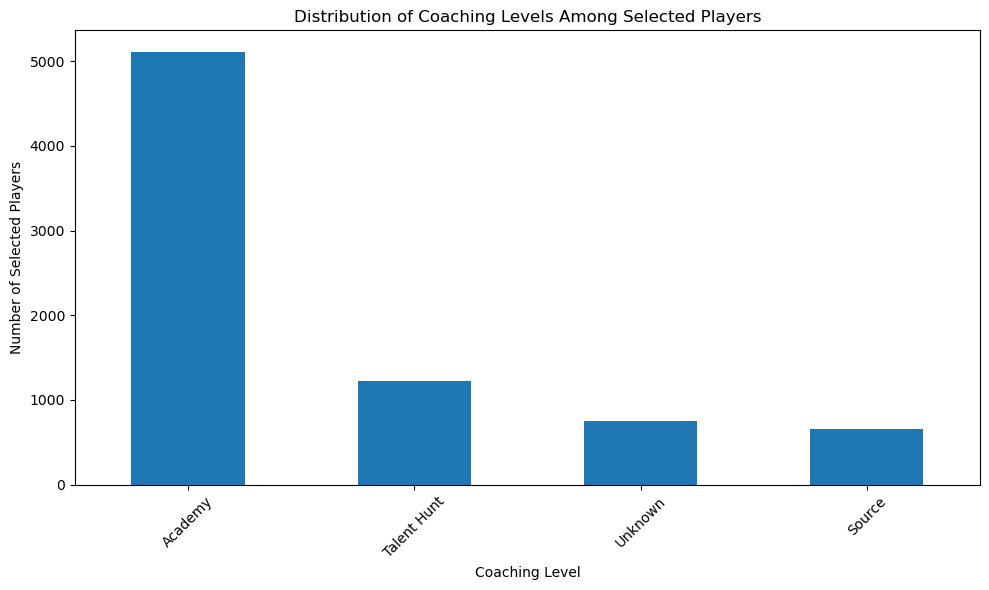

In [11]:
# Filter selected players
selected_players = df[df['selection'] == 1]

# Create a bar plot for coaching levels among selected players
coaching_counts = selected_players['coaching'].value_counts()
plt.figure(figsize=(10, 6))
coaching_counts.plot(kind='bar')
plt.xlabel('Coaching Level')
plt.ylabel('Number of Selected Players')
plt.title('Distribution of Coaching Levels Among Selected Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re

In [13]:
# Handling Missing Values
df = df.dropna()  # Drop rows with missing values

In [14]:
# Preprocessing Height Column
def convert_height(height_str):
    feet, inches = map(int, re.findall(r'\d+', height_str))
    total_inches = (feet * 12) + inches
    return total_inches

df['height'] = df['height'].apply(convert_height)


In [15]:
# Preprocessing Weight Column
def convert_weight(weight_str):
    weight = int(re.search(r'\d+', weight_str).group())
    return weight

df['weight'] = df['weight'].apply(convert_weight)

In [16]:
# Encoding Categorical Variables
categorical_cols = ['gender', 'country']
numeric_cols = ['age', 'height', 'weight', 'goalkeeping_skills']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [17]:
# Feature Scaling and Encoding in one step
X = preprocessor.fit_transform(df.drop('selection', axis=1))
y = df['selection']


In [18]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Selecting a Model
model = RandomForestClassifier(random_state=42)


In [21]:
# Training the Model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Fine-Tuning

In [22]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")